In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ls bart-ridership/

date-hour-soo-dest-2016.csv* station_info.csv*
date-hour-soo-dest-2017.csv*


In [3]:
df_2016 = pd.read_csv('bart-ridership/date-hour-soo-dest-2016.csv')
df_2017 = pd.read_csv('bart-ridership/date-hour-soo-dest-2017.csv')
df_station_info = pd.read_csv('bart-ridership/station_info.csv')

In [4]:
df_2016.head()

,Origin,Destination,Throughput,DateTime
0,12TH,12TH,1,2016-01-01 00:00:00
1,12TH,16TH,1,2016-01-01 00:00:00
2,12TH,24TH,4,2016-01-01 00:00:00
3,12TH,ASHB,4,2016-01-01 00:00:00
4,12TH,BALB,2,2016-01-01 00:00:00


In [5]:
df_2016.shape

(9971582, 4)

In [6]:
df_2017.head()

,Origin,Destination,Throughput,DateTime
0,12TH,19TH,1,2017-01-01 00:00:00
1,12TH,24TH,2,2017-01-01 00:00:00
2,12TH,BAYF,1,2017-01-01 00:00:00
3,12TH,CIVC,5,2017-01-01 00:00:00
4,12TH,COLS,2,2017-01-01 00:00:00


In [7]:
df_2017.shape

(3313625, 4)

In [8]:
df = pd.concat([df_2016, df_2017])

In [9]:
df.shape

(13285207, 4)

In [10]:
df.head()

,Origin,Destination,Throughput,DateTime
0,12TH,12TH,1,2016-01-01 00:00:00
1,12TH,16TH,1,2016-01-01 00:00:00
2,12TH,24TH,4,2016-01-01 00:00:00
3,12TH,ASHB,4,2016-01-01 00:00:00
4,12TH,BALB,2,2016-01-01 00:00:00


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13285207 entries, 0 to 3313624
Data columns (total 4 columns):
Origin         object
Destination    object
Throughput     int64
DateTime       object
dtypes: int64(1), object(3)
memory usage: 506.8+ MB


#### df_station cleanup

In [12]:
df_station_info.head()

,Abbreviation,Description,Location,Name
0,12TH,"1245 Broadway, Oakland CA 94612<br />12th St. ...","-122.271450,37.803768,0",12th St. Oakland City Center (12TH)
1,16TH,"2000 Mission Street, San Francisco CA 94110<br...","-122.419694,37.765062,0",16th St. Mission (16TH)
2,19TH,"1900 Broadway, Oakland CA 94612<br />19th Stre...","-122.268602,37.808350,0",19th St. Oakland (19TH)
3,24TH,"2800 Mission Street, San Francisco CA 94110<br...","-122.418143,37.752470,0",24th St. Mission (24TH)
4,ASHB,"3100 Adeline Street, Berkeley CA 94703<br />As...","-122.270062,37.852803,0",Ashby (ASHB)


In [13]:
df_station_info.shape

(46, 4)

In [14]:
df_station_info['Description'] = df_station_info['Description'].str.replace('<br />','.  ')
df_station_info['Description'].iloc[0]

"1245 Broadway, Oakland CA 94612.  12th St. Oakland City Center Station is in the heart of Downtown Oakland, near historic Old Oakland and Oakland's Chinatown."

#### Parse Logitude and Latitude from 'Location'

In [15]:
longitude = []
latitude = []

for i in range(len(df_station_info['Location'].str.split(','))):
    longitude.append(df_station_info['Location'].str.split(',')[i][0])
    latitude.append(df_station_info['Location'].str.split(',')[i][1])

In [16]:
df_station_info['Longitude'] = pd.Series(longitude)
df_station_info['Latitude'] = pd.Series(latitude)
df_station_info.drop('Location', axis =1, inplace = True)

In [17]:
df_station_info.head()

,Abbreviation,Description,Name,Longitude,Latitude
0,12TH,"1245 Broadway, Oakland CA 94612. 12th St. Oak...",12th St. Oakland City Center (12TH),-122.271450,37.803768
1,16TH,"2000 Mission Street, San Francisco CA 94110. ...",16th St. Mission (16TH),-122.419694,37.765062
2,19TH,"1900 Broadway, Oakland CA 94612. 19th Street ...",19th St. Oakland (19TH),-122.268602,37.808350
3,24TH,"2800 Mission Street, San Francisco CA 94110. ...",24th St. Mission (24TH),-122.418143,37.752470
4,ASHB,"3100 Adeline Street, Berkeley CA 94703. Ashby...",Ashby (ASHB),-122.270062,37.852803


In [18]:
df_location = df_station_info.drop(['Description', 'Name'], axis=1)

In [19]:
df_location.head()

,Abbreviation,Longitude,Latitude
0,12TH,-122.271450,37.803768
1,16TH,-122.419694,37.765062
2,19TH,-122.268602,37.808350
3,24TH,-122.418143,37.752470
4,ASHB,-122.270062,37.852803


In [20]:
df_location['Abbreviation'].unique(), df['Origin'].unique()

(array(['12TH', '16TH', '19TH', '24TH', 'ASHB', 'BALB', 'BAYF', 'CAST',
        'CIVC', 'COLS', 'COLM', 'CONC', 'DALY', 'DBRK', 'DELN', 'DUBL',
        'EMBR', 'FRMT', 'FTVL', 'GLEN', 'HAYW', 'LAFY', 'LAKE', 'MCAR',
        'MLBR', 'MONT', 'NBRK', 'NCON', 'OAKL', 'ORIN', 'PHIL', 'PITT',
        'PLZA', 'POWL', 'RICH', 'ROCK', 'SANL', 'SBRN', 'SFIA', 'SHAY',
        'SSAN', 'UCTY', 'WARM', 'WCRK', 'WDUB', 'WOAK'], dtype=object),
 array(['12TH', '16TH', '19TH', '24TH', 'ASHB', 'BALB', 'BAYF', 'CAST',
        'CIVC', 'COLM', 'COLS', 'CONC', 'DALY', 'DBRK', 'DELN', 'DUBL',
        'EMBR', 'FRMT', 'FTVL', 'GLEN', 'HAYW', 'LAFY', 'LAKE', 'MCAR',
        'MLBR', 'MONT', 'NBRK', 'NCON', 'OAKL', 'ORIN', 'PHIL', 'PITT',
        'PLZA', 'POWL', 'RICH', 'ROCK', 'SANL', 'SBRN', 'SFIA', 'SHAY',
        'SSAN', 'UCTY', 'WCRK', 'WDUB', 'WOAK', 'WSPR'], dtype=object))

In [21]:
df['Origin'].replace('WSPR', 'WARM', inplace=True)
df['Destination'].replace('WSPR', 'WARM', inplace=True)

In [22]:
Longitude = df_location.drop('Latitude', axis=1).set_index('Abbreviation').T.to_dict('list')
Latitude = df_location.drop('Longitude', axis=1).set_index('Abbreviation').T.to_dict('list')

In [23]:
df['Longitude_Origin']= df['Origin'].apply(lambda x: Longitude[x][0])
df['Latitude_Origin']= df['Origin'].apply(lambda x: Latitude[x][0])

In [24]:
df['Longitude_Dest']= df['Destination'].apply(lambda x: Longitude[x][0])
df['Latitude_Dest']= df['Destination'].apply(lambda x: Latitude[x][0])

In [25]:
df.duplicated().sum()

0

In [26]:
df.head(100)

,Origin,Destination,Throughput,DateTime,Longitude_Origin,Latitude_Origin,Longitude_Dest,Latitude_Dest
0,12TH,12TH,1,2016-01-01 00:00:00,-122.271450,37.803768,-122.271450,37.803768
1,12TH,16TH,1,2016-01-01 00:00:00,-122.271450,37.803768,-122.419694,37.765062
2,12TH,24TH,4,2016-01-01 00:00:00,-122.271450,37.803768,-122.418143,37.752470
3,12TH,ASHB,4,2016-01-01 00:00:00,-122.271450,37.803768,-122.270062,37.852803
4,12TH,BALB,2,2016-01-01 00:00:00,-122.271450,37.803768,-122.447506,37.721585
...,...,...,...,...,...,...,...,...
95,19TH,RICH,1,2016-01-01 00:00:00,-122.268602,37.808350,-122.353099,37.936853
96,19TH,ROCK,4,2016-01-01 00:00:00,-122.268602,37.808350,-122.251371,37.844702
97,19TH,SANL,9,2016-01-01 00:00:00,-122.268602,37.808350,-122.160844,37.721947
98,19TH,SBRN,2,2016-01-01 00:00:00,-122.268602,37.808350,-122.416287,37.637761


In [27]:
df_through = df[df.columns[0:3]]
df_through.head(30)

,Origin,Destination,Throughput
0,12TH,12TH,1
1,12TH,16TH,1
2,12TH,24TH,4
3,12TH,ASHB,4
4,12TH,BALB,2
5,12TH,BAYF,2
6,12TH,CIVC,7
7,12TH,CONC,2
8,12TH,DBRK,6
9,12TH,DELN,2


In [28]:
df_though_sums_origin = pd.DataFrame(df_through.drop('Destination', axis=1).groupby('Origin', as_index=False)['Throughput'].sum())
df_though_sums_dest = pd.DataFrame(df_through.drop('Origin', axis=1).groupby('Destination', as_index=False)['Throughput'].sum())

In [29]:
df_though_sums_origin.rename(columns={'Origin': 'Station','Throughput': 'Origin_Through'}, inplace=True)

In [30]:
df_though_sums_dest.rename(columns={'Destination': 'Station','Throughput': 'Dest_Through'}, inplace=True)

In [31]:
df_though_sums = pd.merge(df_though_sums_origin, df_though_sums_dest, on='Station')
df_though_sums.head()

,Station,Origin_Through,Dest_Through
0,12TH,5322811,5391954
1,16TH,5365000,5384505
2,19TH,5213690,5179220
3,24TH,5459492,5303096
4,ASHB,2297869,2219566


In [32]:
df_though_sums['Total_Through'] = df_though_sums['Origin_Through'] + df_though_sums['Dest_Through']

In [33]:
df_though_sums.head()

,Station,Origin_Through,Dest_Through,Total_Through
0,12TH,5322811,5391954,10714765
1,16TH,5365000,5384505,10749505
2,19TH,5213690,5179220,10392910
3,24TH,5459492,5303096,10762588
4,ASHB,2297869,2219566,4517435


In [34]:
df_though_sums.drop(['Origin_Through', 'Dest_Through'], axis=1, inplace=True)

#### So, the Station with the most Throughput is 'EMBR' - Embarcadero

In [35]:
df_though_sums.sort_values('Total_Through', ascending=False).head(10)

,Station,Total_Through
16,EMBR,34076644
25,MONT,33063895
33,POWL,26593039
8,CIVC,19536703
13,DBRK,10806360
3,24TH,10762588
1,16TH,10749505
0,12TH,10714765
2,19TH,10392910
5,BALB,9070671


#### And the station that is least popular is 'WARM'

In [36]:
df_though_sums.sort_values('Total_Through', ascending=False).tail(10)

,Station,Total_Through
37,SBRN,3081435
21,LAFY,2909804
40,SSAN,2870021
44,WDUB,2866915
39,SHAY,2427717
29,ORIN,2394412
7,CAST,2375800
27,NCON,2162392
28,OAKL,1320157
42,WARM,163509


#### Best time to go from SF to Berkeley and get a seat

In [37]:
df_station_Descriptions = df_station_info.drop(['Name', 'Longitude', 'Latitude'], axis=1)
df_station_Descriptions.head()

,Abbreviation,Description
0,12TH,"1245 Broadway, Oakland CA 94612. 12th St. Oak..."
1,16TH,"2000 Mission Street, San Francisco CA 94110. ..."
2,19TH,"1900 Broadway, Oakland CA 94612. 19th Street ..."
3,24TH,"2800 Mission Street, San Francisco CA 94110. ..."
4,ASHB,"3100 Adeline Street, Berkeley CA 94703. Ashby..."


In [38]:
df_station_in_SF_Berk = pd.DataFrame(df_station_Descriptions['Abbreviation'])
df_station_in_SF_Berk.rename(columns={'Abbreviation': 'Station'}, inplace=True)
df_station_in_SF_Berk['San_Francisco'] = df_station_Descriptions['Description'].str.contains('Francisco').replace([True, False], [1,0])
df_station_in_SF_Berk['Berkeley'] = df_station_Descriptions['Description'].str.contains('Berkeley').replace([True, False], [1,0])


In [39]:
df_station_in_SF_Berk.head()

,Station,San_Francisco,Berkeley
0,12TH,0,0
1,16TH,1,0
2,19TH,0,0
3,24TH,1,0
4,ASHB,0,1


In [40]:
df_berk = df_station_in_SF_Berk[df_station_in_SF_Berk['Berkeley'] == 1].drop('San_Francisco', axis=1)
berkeley_stations = list(df_berk['Station'])

In [41]:
df_sanfran = df_station_in_SF_Berk[df_station_in_SF_Berk['San_Francisco'] == 1].drop('Berkeley', axis=1)
sanfran_stations = list(df_sanfran['Station'])

In [42]:
df_time = df.iloc[:,0:4]

In [43]:
df_time.head()

,Origin,Destination,Throughput,DateTime
0,12TH,12TH,1,2016-01-01 00:00:00
1,12TH,16TH,1,2016-01-01 00:00:00
2,12TH,24TH,4,2016-01-01 00:00:00
3,12TH,ASHB,4,2016-01-01 00:00:00
4,12TH,BALB,2,2016-01-01 00:00:00


In [44]:
df_best_throughput = df_time[(df_time['Destination'].isin(berkeley_stations)) & (df_time['Origin'].isin(sanfran_stations))].sort_values('Throughput', ascending=True)
df_best_throughput.head()

,Origin,Destination,Throughput,DateTime
3313594,WOAK,ASHB,1,2017-05-03 23:00:00
2541381,GLEN,NBRK,1,2016-04-03 10:00:00
2541363,GLEN,ASHB,1,2016-04-03 10:00:00
8560674,SFIA,PLZA,1,2016-11-09 00:00:00
8560688,SSAN,ASHB,1,2016-11-09 00:00:00


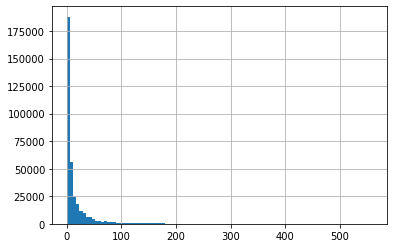

In [45]:
df_best_throughput['Throughput'].hist(bins = 100)
plt.show()

#### If there are at least 200 seats..

In [46]:
#df_best_throughput = df_best_throughput[df_best_throughput['Throughput'] < 200]
df_best_throughput['Throughput'] = np.log(df_best_throughput['Throughput'])
df_best_throughput.shape

(351477, 4)

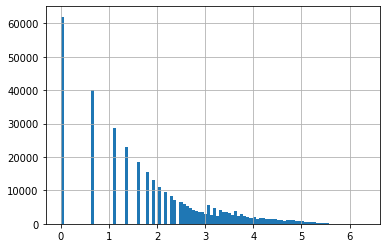

In [47]:
df_best_throughput['Throughput'].hist(bins = 100)
plt.show()

In [48]:
df_best_throughput.head()

,Origin,Destination,Throughput,DateTime
3313594,WOAK,ASHB,0.0,2017-05-03 23:00:00
2541381,GLEN,NBRK,0.0,2016-04-03 10:00:00
2541363,GLEN,ASHB,0.0,2016-04-03 10:00:00
8560674,SFIA,PLZA,0.0,2016-11-09 00:00:00
8560688,SSAN,ASHB,0.0,2016-11-09 00:00:00


In [49]:
df_best_throughput.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351477 entries, 3313594 to 5743538
Data columns (total 4 columns):
Origin         351477 non-null object
Destination    351477 non-null object
Throughput     351477 non-null float64
DateTime       351477 non-null object
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


In [50]:
df_best_throughput['DateTime'] = pd.to_datetime(df_best_throughput['DateTime'])

In [51]:
df_best_throughput['day'] = df_best_throughput['DateTime'].apply(lambda x: x.weekday())
df_best_throughput['hour'] = df_best_throughput['DateTime'].apply(lambda x: x.hour)
df_best_throughput['Throughput'] = np.exp(df_best_throughput['Throughput'])

In [52]:
df_best_throughput.head()

,Origin,Destination,Throughput,DateTime,day,hour
3313594,WOAK,ASHB,1.0,2017-05-03 23:00:00,2,23
2541381,GLEN,NBRK,1.0,2016-04-03 10:00:00,6,10
2541363,GLEN,ASHB,1.0,2016-04-03 10:00:00,6,10
8560674,SFIA,PLZA,1.0,2016-11-09 00:00:00,2,0
8560688,SSAN,ASHB,1.0,2016-11-09 00:00:00,2,0


#### Best Time to travel on Sunday

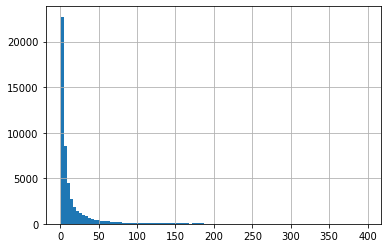

In [53]:
df_best_throughput[df_best_throughput['day'] == 0]['Throughput'].hist(bins=100)
plt.show()

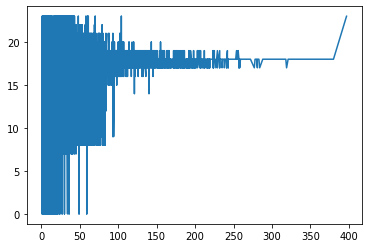

In [54]:
plt.plot(df_best_throughput[df_best_throughput['day'] == 0]['Throughput'], df_best_throughput[df_best_throughput['day'] == 0]['hour'])

#### Plot Throughput vs Time according to the Day.  Here the red vertical line correspond to 9am and 5pm.

In [58]:
def GetMinVal9to5(df_through_grouped, Day, hour_lowerbound, hour_upperbound):
    return df_through_grouped[(df_through_grouped['day'] == 0) & 
                       (df_through_grouped['hour'] > hour_lowerbound) &
                       (df_through_grouped['hour'] < hour_upperbound)].sort_values('Throughput', ascending=True).iloc[0]['hour']

In [69]:
def Plot_ThroughputvsDay(Day):
    df_through_grouped = df_best_throughput.groupby(['day', 'hour'], as_index=False).sum()
    plt.plot(df_through_grouped[df_through_grouped['day'] == Day]['hour'], df_through_grouped[df_through_grouped['day'] == Day]['Throughput'], '-o')
    plt.axvline(x=9, color='r')
    plt.axvline(x=19, color='r')
    plt.title('Throughput on day ' + str(Day))
    plt.xlabel("Time (hrs)")
    plt.ylabel("Throughput (unitless)")
    
    plt.figtext(.2, .7, "Best Time to \nTravel between \n9-7: " + str(GetMinVal9to5(df_through_grouped, Day,9,19)))

    plt.figtext(.2, .55, "Best Time to \nTravel: " + str(GetMinVal9to5(df_through_grouped, Day,0,25)))
    
    plt.show()

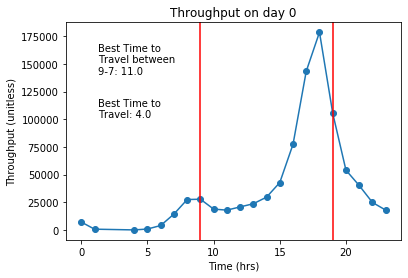

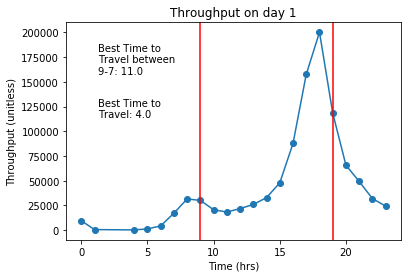

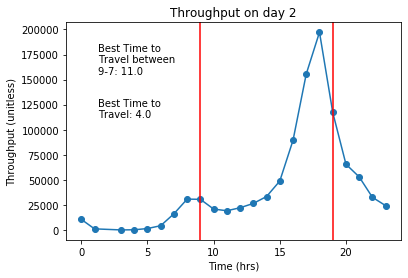

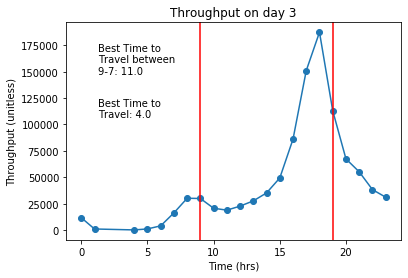

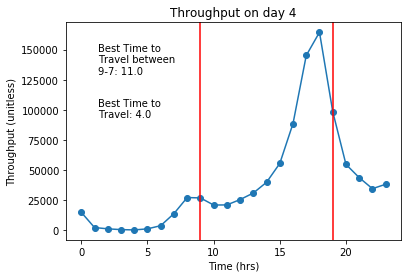

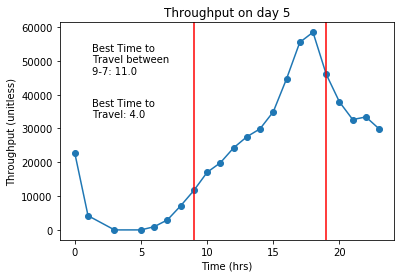

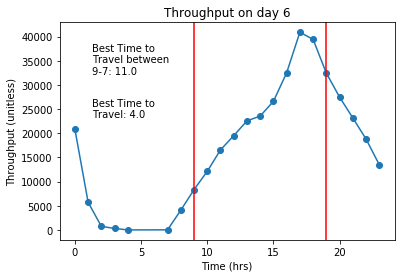

In [70]:
for i in range(7): Plot_ThroughputvsDay(i)

#### Which is the busiest day?   Day2 is the busiest day with a Throughput of almost 1M people.  

In [68]:
df_best_throughput.groupby('day', as_index=False).sum().drop('hour', axis=1).sort_values('Throughput', ascending=False)

,day,Throughput
2,2,999909.0
3,3,998387.0
1,1,996420.0
4,4,951459.0
0,0,878940.0
5,5,541642.0
6,6,388995.0


#### How many people take Bart at night?  If night is considered between 7pm - 7am:

In [71]:
df_best_throughput.head()

,Origin,Destination,Throughput,DateTime,day,hour
3313594,WOAK,ASHB,1.0,2017-05-03 23:00:00,2,23
2541381,GLEN,NBRK,1.0,2016-04-03 10:00:00,6,10
2541363,GLEN,ASHB,1.0,2016-04-03 10:00:00,6,10
8560674,SFIA,PLZA,1.0,2016-11-09 00:00:00,2,0
8560688,SSAN,ASHB,1.0,2016-11-09 00:00:00,2,0


In [83]:
df_best_throughput[(df_best_throughput['hour'] < 8) | 
                   (df_best_throughput['hour'] > 19)].groupby('day').sum().drop('hour', axis = 1).sort_values('Throughput', ascending=False)

,Throughput
day,
3,226389.0
2,208534.0
4,207821.0
1,203615.0
0,164745.0
5,164633.0
6,110495.0


#### Straight Line Distance Between Every Station: